In [1]:
import pandas as pd
import numpy as np
from random import randrange
import numpy as np
from numpy.random import random_integers as rnd
import matplotlib.pyplot as plt
import math

In [2]:
def maze(width=80, height=40, complexity=.75, density =.75):
    # Only odd shapes
    shape = ((height//2)*2+1, (width//2)*2+1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity*(5*(shape[0]+shape[1])))
    density    = int(density*(shape[0]//2*shape[1]//2))
    # Build actual maze
    Z = np.zeros(shape)
    # Fill borders
    Z[0,:] = Z[-1,:] = 1
    Z[:,0] = Z[:,-1] = 1
    # Make isles
    for i in range(density):
        x, y = rnd(0,shape[1]//2)*2, rnd(0,shape[0]//2)*2
        Z[y,x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:           neighbours.append( (y,x-2) )
            if x < shape[1]-2:  neighbours.append( (y,x+2) )
            if y > 1:           neighbours.append( (y-2,x) )
            if y < shape[0]-2:  neighbours.append( (y+2,x) )
            if len(neighbours):
                y_,x_ = neighbours[rnd(0,len(neighbours)-1)]
                if Z[y_,x_] == 0:
                    Z[y_,x_] = 1
                    Z[y_+(y-y_)//2, x_+(x-x_)//2] = 1
                    x, y = x_, y_
    return Z

In [3]:
def create_mz(width = 80, height = 40):
    mz = maze(width, height)
    for i in range(100):
        x = randrange(mz.shape[1]-1) #start 2
        y = randrange(mz.shape[1]-1) #end 3
        if (x!=0 & x!=(randrange(mz.shape[1]-1)) & y!=0 & y!=(randrange(mz.shape[1]-1)) &(mz[1][y]!=1) & (mz[mz.shape[0]-2][x]!=1)):
            mz[mz.shape[0]-1][x] = 2
            mz[0][y] = 3
            break
    start = (mz.shape[0]-1,x)
    end = (0, y)
    return(mz, start, end)

In [4]:
def moving(mz, seq, current_pos):
    for i in seq:
        if ((i == 'n') & (current_pos[0]!=0)):
            if((mz[current_pos[0]-1, current_pos[1]]!=1)):
                current_pos = (current_pos[0]-1, current_pos[1])
        if ((i == 's') & (current_pos[0]!=(mz.shape[0]-1))):
            if((mz[current_pos[0] + 1, current_pos[1]]!=1)):
                current_pos = (current_pos[0]+1, current_pos[1])
        if ((i == 'w') & (mz[(current_pos[0], current_pos[1]-1)]!=1)):
            current_pos = (current_pos[0], current_pos[1]-1)
        if ((i == 'e') & (mz[(current_pos[0], current_pos[1]+1)]!=1)):
            current_pos = (current_pos[0], current_pos[1]+1)
    return(current_pos)

In [5]:
def display_current_pos(mz, current_pos, figsize=(6,4), cmap = plt.cm.binary):
    mz2 = mz.copy()
    mz2[current_pos] = 4
    plt.figure(figsize=figsize)
    plt.imshow(mz2,interpolation='nearest', cmap=cmap)
    plt.xticks([]),plt.yticks([])
    plt.show()

In [6]:
def display_action_sequence(mz, seq, current_pos, figsize = (6,4), cmap = plt.cm.binary):
    mz2 = mz.copy()
    for i in seq:
        current_pos = moving(mz, i, current_pos)
        mz2[current_pos] = 4
    plt.figure(figsize=figsize)
    plt.imshow(mz2,interpolation='nearest', cmap=cmap) #plt.cm.binary
    plt.xticks([]),plt.yticks([])
    plt.show()

# Mapping GridWorld (attenzione, le funzioni hanno lo stesso nome di quelle create per il Fuzzy_Counter_Ant_Algorithm, ma sono diverse) 

In [7]:
def actions_val(gridWorld, ant_pos, start, end):
    #print(ant_pos)
    #print(start)
    value_act = []
    if (ant_pos == start):
        #print('ok')
        value_act = [0, float('nan'), float('nan'), float('nan')]
    elif (ant_pos == end):
        value_act = [float('nan'), 0, float('nan'), float('nan')]
    else:
        for i in actions:
            if (i == "n"):
                value_act.append(gridWorld[(ant_pos[0]-1, ant_pos[1])])
            if (i == "s"):
                value_act.append(gridWorld[(ant_pos[0]+1, ant_pos[1])])
            if (i == "e"):
                value_act.append(gridWorld[(ant_pos[0], ant_pos[1]+1)])
            if (i == "w"):
                value_act.append(gridWorld[(ant_pos[0], ant_pos[1]-1)])  
    return(value_act)

In [8]:
def is_decision_node(gridWorld, ant_pos, start, end, ant):
    b = False
    if (ant_pos == start):
        b = True
    if (ant_pos == end):
        b = True
    value_act = actions_val(gridWorld, ant_pos, start, end)
    non_zeros = np.count_nonzero(value_act)
    if (non_zeros <= 2):
        b = True
    how_many_ants = len(actions) - non_zeros
    if(ant['n_visited_nodes']==1)&(gridWorld[ant_pos]==999):
        b = True
    return b, how_many_ants

In [9]:
def moving_ant(gridWorld, ant_pos, start, end, ant):
    nm = np.nanmin(actions_val(gridWorld,ant_pos, start, end))
    if ((ant['n_visited_nodes']==1) & (np.nanmax(actions_val(gridWorld,ant_pos, start, end)) == 999) & (nm!=0)):
        a = np.nanargmax(actions_val(gridWorld,ant_pos, start, end))
        if(ant['start_node']!=moving(mz, seq = actions[a], current_pos = ant_pos )):
            action_idx = a
                #print(actions_val(gridWorld,ant_pos, start, end), actions[action_idx], ant_pos)
        else:
            action_idx = np.nanargmin(actions_val(gridWorld,ant_pos, start, end))
    else:
        action_idx = np.nanargmin(actions_val(gridWorld,ant_pos, start, end))
    #print(ant_pos, actions_val(gridWorld,ant_pos, start, end), ant['n_visited_nodes'], np.nanmax(actions_val(gridWorld,ant_pos, start, end)), np.nanmin(actions_val(gridWorld,ant_pos, start, end)), actions[action_idx])
    return(actions[action_idx]) 

In [10]:
def update_grid_after_action(gridWorld, ant_pos):
    if(gridWorld[ant_pos]==0):
        gridWorld[ant_pos] = 1
    return gridWorld

In [12]:
mz, start, end = create_mz(width=10,height=10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


In [13]:
def training (gridWorld, max_iter = 200, start = start, end = end):
    n_ants = 0
    ants = {}
    ant_info = {}
    ant_info['position'] = start
    ant_info['start_node'] = start
    ant_info['n_visited_nodes'] = 1 #visto che parte da start che è un nodo, allora n_visited_nodes è 1
    ant_info['actions'] = []
    ants["ant{0}".format(n_ants)] = ant_info
    for i in range(max_iter):
        #print(gridWorld,ants)
        for j in range(len(ants)):
            n_visited_nodes = ants["ant{0}".format(j)]['n_visited_nodes']
            if (n_visited_nodes < 2 ):
                ant_pos = ants["ant{0}".format(j)]['position']
                action = moving_ant(gridWorld, ant_pos, start, end, ants["ant{0}".format(j)])
                ants["ant{0}".format(j)]['actions'].append(action)
                ants["ant{0}".format(j)]['position'] = moving(mz, seq = action, current_pos = ant_pos)
                ant_pos = ants["ant{0}".format(j)]['position']
                gridWorld = update_grid_after_action(gridWorld, ant_pos)
                b, how_many_ants = is_decision_node(gridWorld,ant_pos, start, end, ants["ant{0}".format(j)])
                if (b == True):
                    gridWorld[ant_pos] = 999
                    ants["ant{0}".format(j)]['n_visited_nodes'] += 1
                    if(ants["ant{0}".format(j)]['n_visited_nodes'] == 2):
                        ants["ant{0}".format(j)]['end_node'] = ant_pos
                    for i in range(how_many_ants):
                        n_ants += 1
                        ant_info = {}
                        ant_info['position'] = ant_pos
                        ant_info['n_visited_nodes'] = 1
                        ant_info['start_node'] = ant_pos
                        ant_info['actions'] = []
                        ants["ant{0}".format(n_ants)] = ant_info
    return gridWorld, ants

In [14]:
def prepare_dict_for_dijskstra(ants):
    diz_out = {}
    idx = 0
    for j in ants:
        #print(j)
        i = ants[j]
        if ('end_node' in i.keys()):
            #print(diz_out.keys())
            if (i['start_node'] not in diz_out.keys()):
                d = {}
                d[i['end_node']] = len(i['actions'])
                diz_out[i['start_node']] = d
            else:
                diz_out[i['start_node']][i['end_node']] = len(i['actions'])
    l = []
    for d in diz_out:
        for key in diz_out[d]:
            if (key not in diz_out.keys()):
                l.append(key)
                x = d
    #print(l, x)
    
    for i in range(len(l)):
        diz_out[l[i]] = {x: 9999999999}
    return diz_out

In [15]:
def get_action_sequence(l, ants):
    action_s = []
    diz = {}
    for i in range(len(l)-1):
        for j in ants:
            d = ants[j]
            if ('end_node' in d.keys()):
                if ((d['start_node'] == l[i])&(d['end_node']==l[i+1])):
                    if l[i] not in diz.keys():
                        action_s.extend(d['actions'])
                    diz[l[i]] = l[i+1]
    return action_s                

# Dijsktra

In [16]:
from __future__ import generators
class priorityDictionary(dict):
    def __init__(self):
        self.__heap = []
        dict.__init__(self)

    def smallest(self):
        if len(self) == 0:
            raise IndexError 
        heap = self.__heap
        while heap[0][1] not in self or self[heap[0][1]] != heap[0][0]:
            lastItem = heap.pop()
            insertionPoint = 0
            while 1:
                smallChild = 2*insertionPoint+1
                if smallChild+1 < len(heap) and \
                        heap[smallChild] > heap[smallChild+1]:
                    smallChild += 1
                if smallChild >= len(heap) or lastItem <= heap[smallChild]:
                    heap[insertionPoint] = lastItem
                    break
                heap[insertionPoint] = heap[smallChild]
                insertionPoint = smallChild
        return heap[0][1]
	
    def __iter__(self):
        def iterfn():
            while len(self) > 0:
                x = self.smallest()
                yield x
                del self[x]
        return iterfn()
	
    def __setitem__(self,key,val):
        dict.__setitem__(self,key,val)
        heap = self.__heap
        if len(heap) > 2 * len(self):
            self.__heap = [(v,k) for k,v in self.iteritems()]
            self.__heap.sort()  # builtin sort likely faster than O(n) heapify
        else:
            newPair = (val,key)
            insertionPoint = len(heap)
            heap.append(None)
            while insertionPoint > 0 and \
                    newPair < heap[(insertionPoint-1)//2]:
                heap[insertionPoint] = heap[(insertionPoint-1)//2]
                insertionPoint = (insertionPoint-1)//2
            heap[insertionPoint] = newPair
	
    def setdefault(self,key,val):
        if key not in self:
            self[key] = val
        return self[key]
def Dijkstra(G,start,end=None):

	D = {}	# dictionary of final distances
	P = {}	# dictionary of predecessors
	Q = priorityDictionary()   # est.dist. of non-final vert.
	Q[start] = 0
	
	for v in Q:
		D[v] = Q[v]
		if v == end: break
		
		for w in G[v]:
			vwLength = D[v] + G[v][w]
			if w in D:
				if vwLength < D[w]:
					raise ValueError
			elif w not in Q or vwLength < Q[w]:
				Q[w] = vwLength
				P[w] = v
	
	return (D,P)
			
def shortestPath(G,start,end):

	D,P = Dijkstra(G,start,end)
	Path = []
	while 1:
		Path.append(end)
		if end == start: break
		end = P[end]
	Path.reverse()
	return Path

In [21]:
%%time
#mz, start, end = create_mz(width=200,height=200)
actions = ['n', 's', 'e','w']
gridWorld = mz.copy()
gridWorld[gridWorld == 1] = float('nan')
gridWorld[gridWorld == 0] = 0
gridWorld[gridWorld == 2] = 0
gridWorld[gridWorld == 3] = 0
gridWorld[start]=0
gridWorld[end]=0

CPU times: user 945 µs, sys: 726 µs, total: 1.67 ms
Wall time: 1.01 ms


In [22]:
%%time
gridWorld, ants = training(gridWorld, max_iter=500, start=start, end = end) #con 500 funziona

CPU times: user 1min 43s, sys: 2.15 s, total: 1min 45s
Wall time: 1min 50s


In [23]:
len(gridWorld[gridWorld==0])

0

In [24]:
G = prepare_dict_for_dijskstra(ants)

In [25]:
sp = shortestPath(G, start, end)

for j in ants:
    i = ants[j]
    if('end_node' in i.keys()):    
        if ((i['start_node']==(100,82)) & (i['end_node']==(99,82))):
            print(i)

In [26]:
act_seq = get_action_sequence(sp, ants)

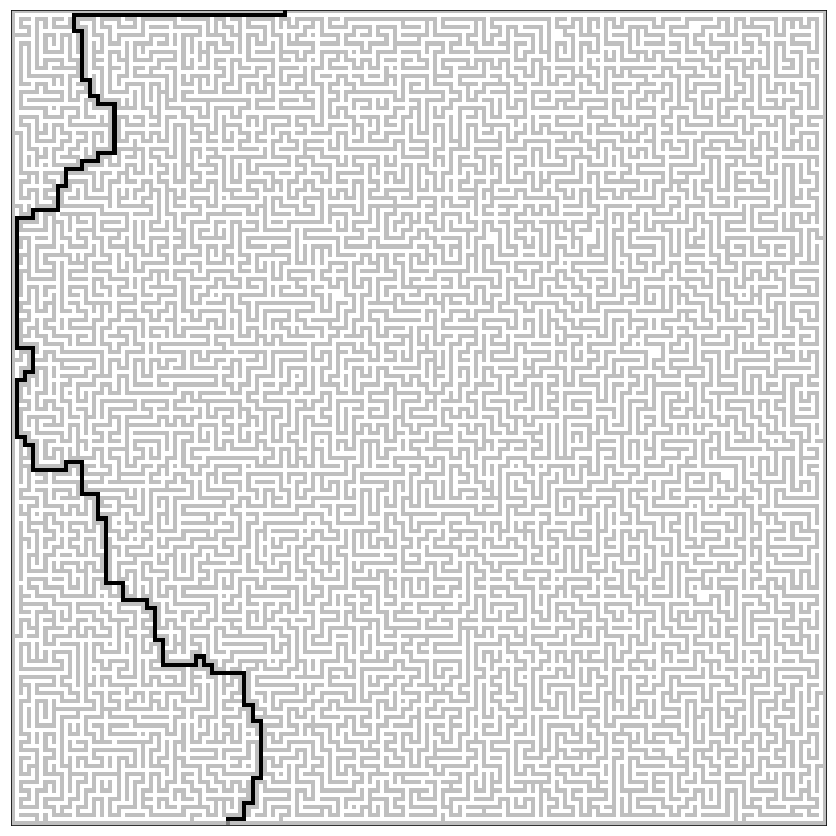

In [28]:
display_action_sequence(mz, act_seq, current_pos = start, figsize=(15,15))